In [6]:
import os, json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
data_path = "./data/simulation_results/pouct_sweep/"
file_names = [f for f in os.listdir(data_path) if f.endswith('.json')]

data = []
for file_name in file_names:
    with open(data_path+file_name, "r") as f:
        content = json.load(f)
    data.append(content)

df = pd.DataFrame(data)
df.columns

Index(['true_reward', 'expected_reward', 'runtime', 'actions', 'seed', 'steps',
       'exploration_coeff', 'rollout_depth'],
      dtype='object')

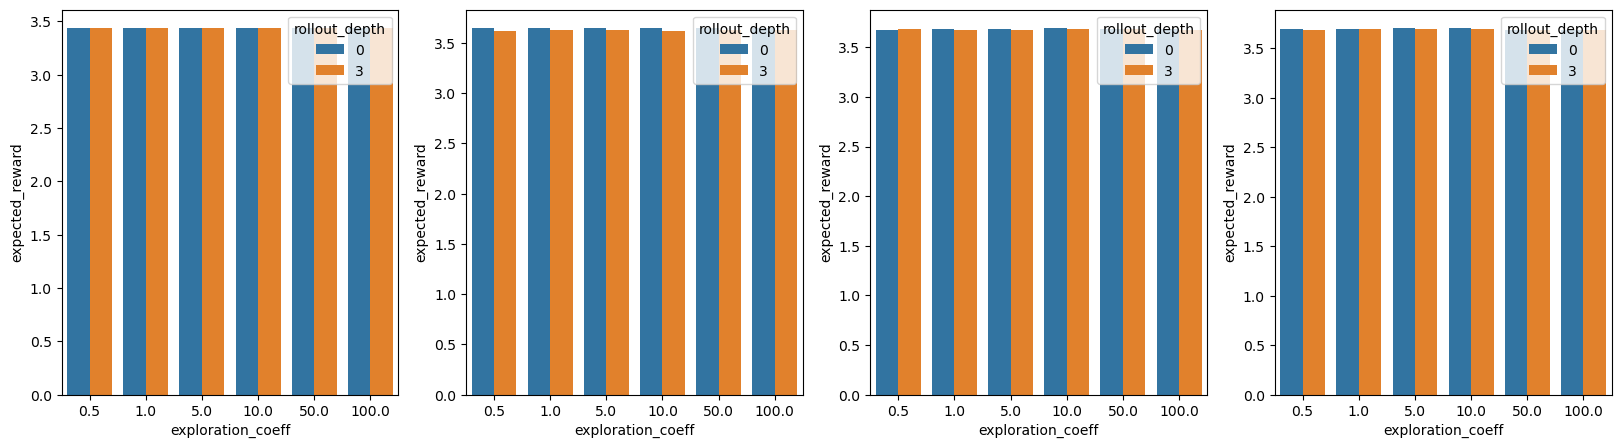

In [10]:
fig, axes =plt.subplots(1,4, figsize=(20,5))
axes = axes.flatten()

g = sns.barplot(df[df['steps']==10], y="expected_reward", x="exploration_coeff", hue="rollout_depth", ax=axes[0])
g = sns.barplot(df[df['steps']==100], y="expected_reward", x="exploration_coeff", hue="rollout_depth", ax=axes[1])
g = sns.barplot(df[df['steps']==1000], y="expected_reward", x="exploration_coeff", hue="rollout_depth", ax=axes[2])
g = sns.barplot(df[df['steps']==5000], y="expected_reward", x="exploration_coeff", hue="rollout_depth", ax=axes[3])

In [12]:
df.groupby(["steps", "exploration_coeff", "rollout_depth"])["expected_reward"].mean()

steps  exploration_coeff  rollout_depth
10     0.5                0                3.437838
                          3                3.437308
       1.0                0                3.437838
                          3                3.437510
       5.0                0                3.437838
                          3                3.437000
       10.0               0                3.437838
                          3                3.435904
       50.0               0                3.437838
                          3                3.435360
       100.0              0                3.437838
                          3                3.433625
100    0.5                0                3.650841
                          3                3.624425
       1.0                0                3.650841
                          3                3.631018
       5.0                0                3.650841
                          3                3.630538
       10.0             

In [17]:
step_list = [10, 100, 1000, 5000]
exploration_coeff_list = [0.5, 1, 5, 10, 50, 100]
rollout_depth_list = [0, 3]

for step in step_list:
    max_score = df[(df["steps"]==step) & (df["exploration_coeff"]==exploration_coeff_list[0]) & (df["rollout_depth"]==rollout_depth_list[0])]["expected_reward"].item()
    best = (exploration_coeff_list[0], rollout_depth_list[0])
    for exploration_coeff in exploration_coeff_list:
        for rollout_depth in rollout_depth_list:
            score = df[(df["steps"]==step) & (df["exploration_coeff"]==exploration_coeff) & (df["rollout_depth"]==rollout_depth)]["expected_reward"].item()
            if score > max_score:
                max_score = score
                best = (exploration_coeff, rollout_depth)
    print(f"{step} steps: c={best[0]}, depth={best[1]} (score={max_score})")

10 steps: c=0.5, depth=0 (score=3.4378383647496817)
100 steps: c=0.5, depth=0 (score=3.6508409110380886)
1000 steps: c=10, depth=0 (score=3.6951088300956654)
5000 steps: c=10, depth=0 (score=3.704249016068181)
